In [1]:
import matplotlib.pyplot as plt
import numpy as np
from libeq import EqSolver
from libeq import SolverData
from libeq import species_concentration

%load_ext pyinstrument

# Create SolverData object
solver_data = SolverData.load_from_bstac(
    "/Users/lorenzo/Coding/libeq/notebooks/Zn-EDTA"
)

In [3]:
result, log_beta, log_ks, saturation_index, total_concentration = EqSolver(
    solver_data, mode="titration"
)

In [4]:
solution = species_concentration(
    result,
    log_beta,
    solver_data.stoichiometry,
    full=True,
)

In [5]:
charges = np.concatenate((solver_data.charges, solver_data.species_charges))

ionic_strength = 0.5 * (solution * (charges**2)).sum(axis=1, keepdims=True)

ionic_strength

array([[0.01417079],
       [0.01415938],
       [0.01414797],
       [0.01413656],
       [0.01377729],
       [0.01342478],
       [0.01297896],
       [0.01253154],
       [0.01208923],
       [0.01165282],
       [0.01122244],
       [0.01079328],
       [0.01036749],
       [0.00994822],
       [0.00953371],
       [0.00912204],
       [0.00871258],
       [0.00831111],
       [0.00791428],
       [0.00752106],
       [0.00713128],
       [0.00674818],
       [0.00637173],
       [0.00599789],
       [0.0056299 ],
       [0.00526983],
       [0.00491764],
       [0.0045695 ],
       [0.00423129],
       [0.00390394],
       [0.00358793],
       [0.00328441],
       [0.00299384],
       [0.00272707],
       [0.00248779],
       [0.0022843 ],
       [0.00212815],
       [0.00204108],
       [0.0020414 ],
       [0.00213721],
       [0.00231873],
       [0.00253608],
       [0.00273183],
       [0.00288601],
       [0.00299465],
       [0.00305636],
       [0.00310828],
       [0.003

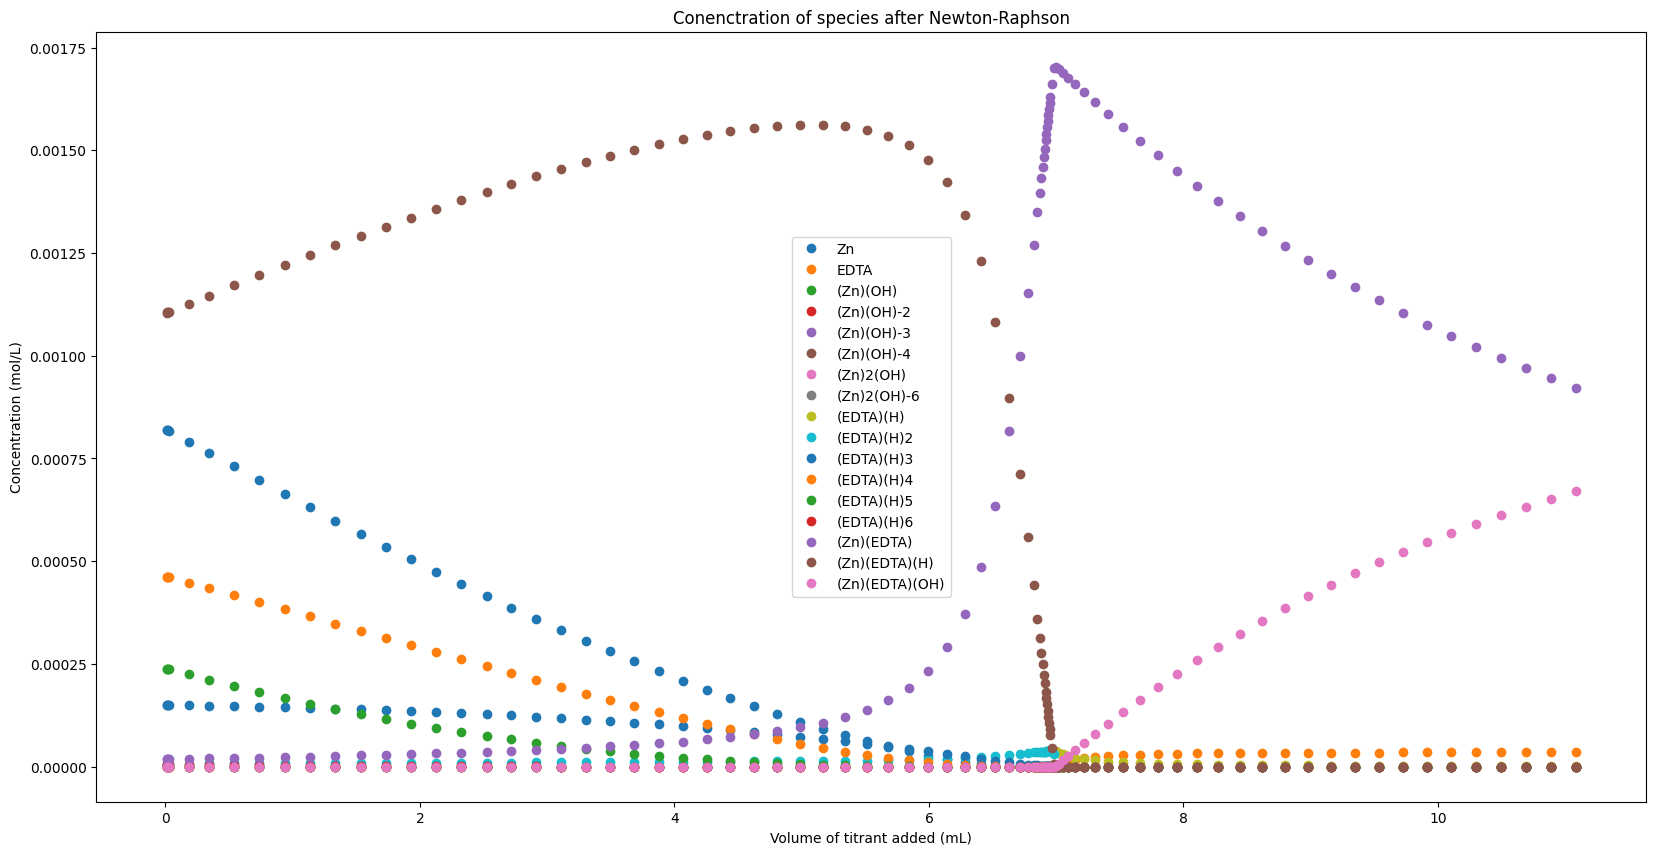

In [6]:
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(
    solver_data.v_add,
    solution[:, [i for i in range(solution.shape[1]) if i not in [2, 3]]],
    "o",
)
plt.title("Conenctration of species after Newton-Raphson")
plt.ylabel("Concentration (mol/L)")
plt.xlabel("Volume of titrant added (mL)")
plt.legend(
    handles=ax1.lines,
    labels=solver_data.species_names[:2] + solver_data.species_names[4:],
);